In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
from google.colab import files
uploaded = files.upload()

Saving survey-3.csv to survey-3.csv


In [24]:
df = pd.read_csv('survey-3.csv', sep=';', encoding='utf-8')
df = df.iloc[:, :6]
df.columns = ['ID', 'Direction', 'Question', 'Program', 'Score_Raw', 'Justification']
df['Direction'] = df['Direction'].ffill()
df['Question'] = df['Question'].ffill()
df['Score'] = df['Score_Raw'].astype(str).str.replace(',', '.').astype(float)

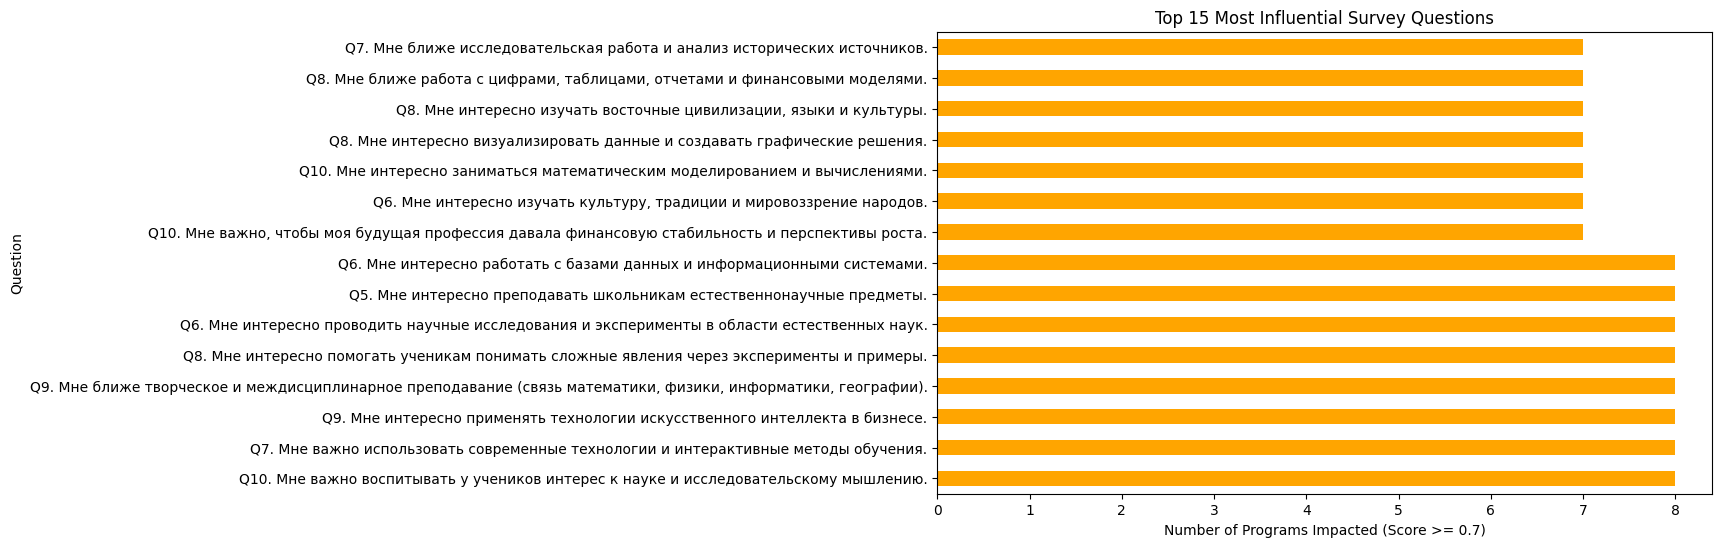

In [25]:
universal_questions = df[df['Score'] >= 0.7].groupby('Question')['Program'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
universal_questions.head(15).plot(kind='barh', color='orange')
plt.title('Top 15 Most Influential Survey Questions')
plt.xlabel('Number of Programs Impacted (Score >= 0.7)')
plt.show()

/tmp/ipython-input-3655128018.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



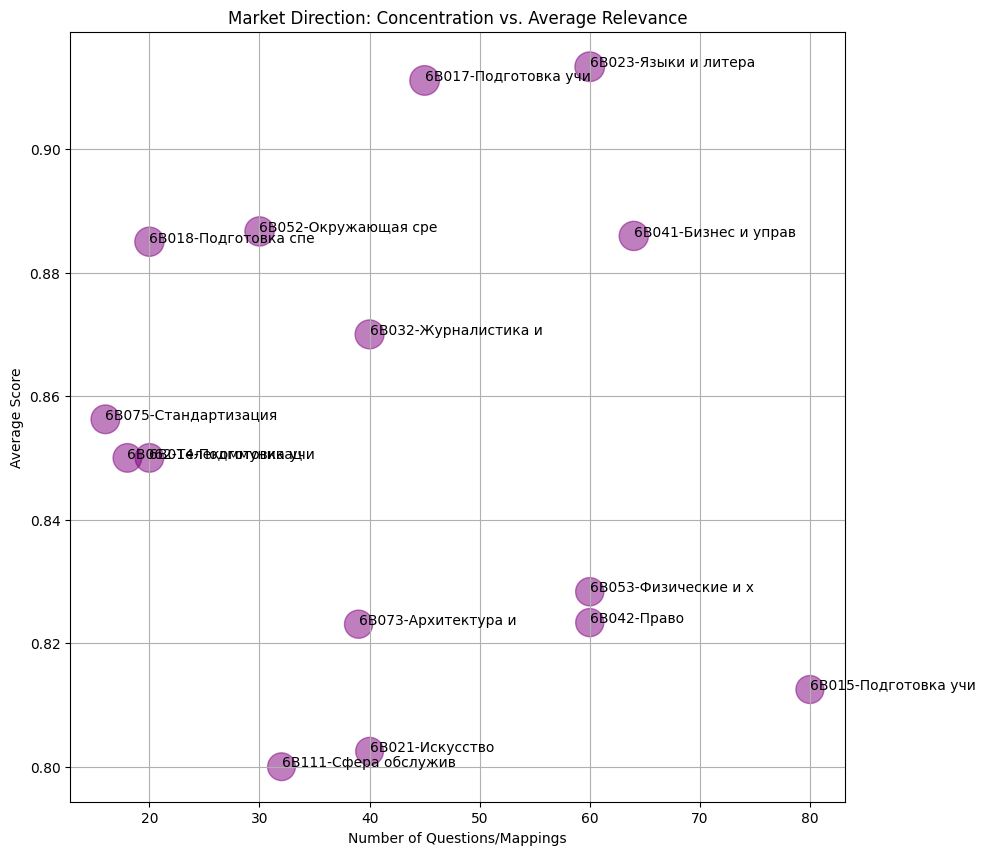

In [61]:
direction_stats = direction_stats.head(15)
plt.figure(figsize=(10, 10))
plt.scatter(direction_stats['count'], direction_stats['mean'], s=direction_stats['mean']*500, alpha=0.5, c='purple')
for i, txt in enumerate(direction_stats.index):
    plt.annotate(txt[:20], (direction_stats['count'][i], direction_stats['mean'][i]))

plt.title('Market Direction: Concentration vs. Average Relevance')
plt.xlabel('Number of Questions/Mappings')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

In [27]:
import plotly.express as px

sample_program = df['Program'].unique()[0]
data = df[df['Program'] == sample_program]

fig = px.line_polar(data, r='Score', theta='Question', line_close=True,
                    title=f"Program Profile: {sample_program}")
fig.update_traces(fill='toself')
fig.show()

/tmp/ipython-input-304543407.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




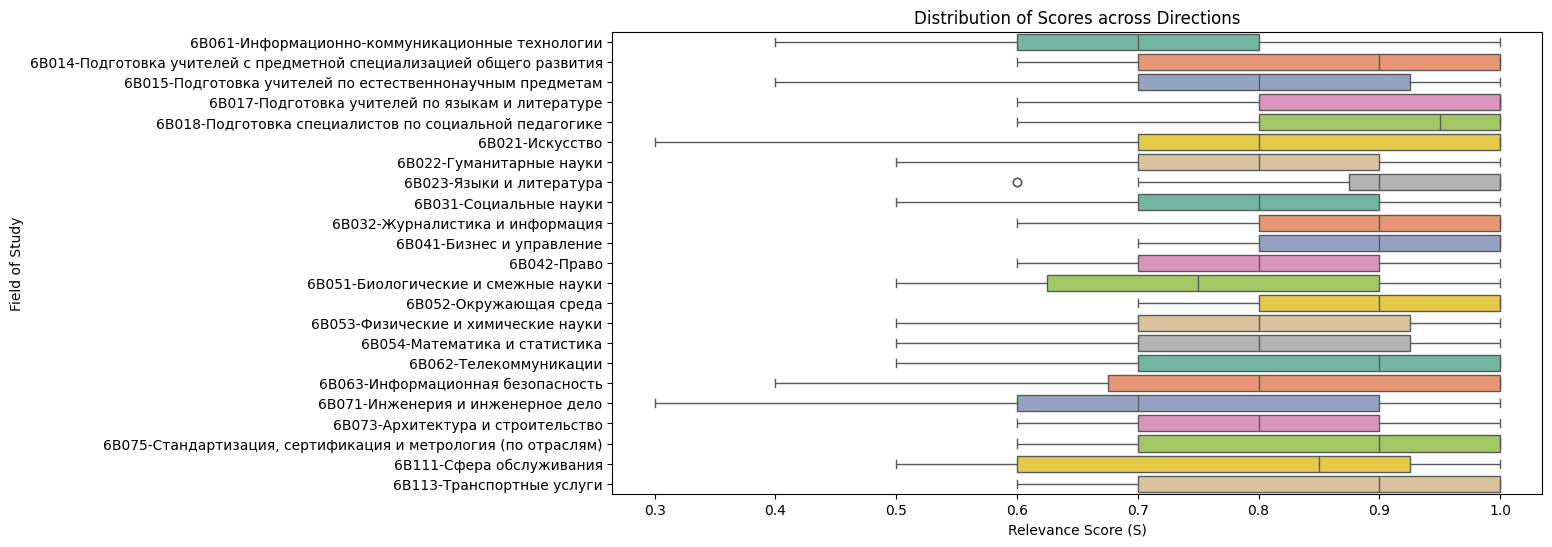

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Score', y='Direction', data=df, palette='Set2')
plt.title('Distribution of Scores across Directions')
plt.xlabel('Relevance Score (S)')
plt.ylabel('Field of Study')
plt.show()

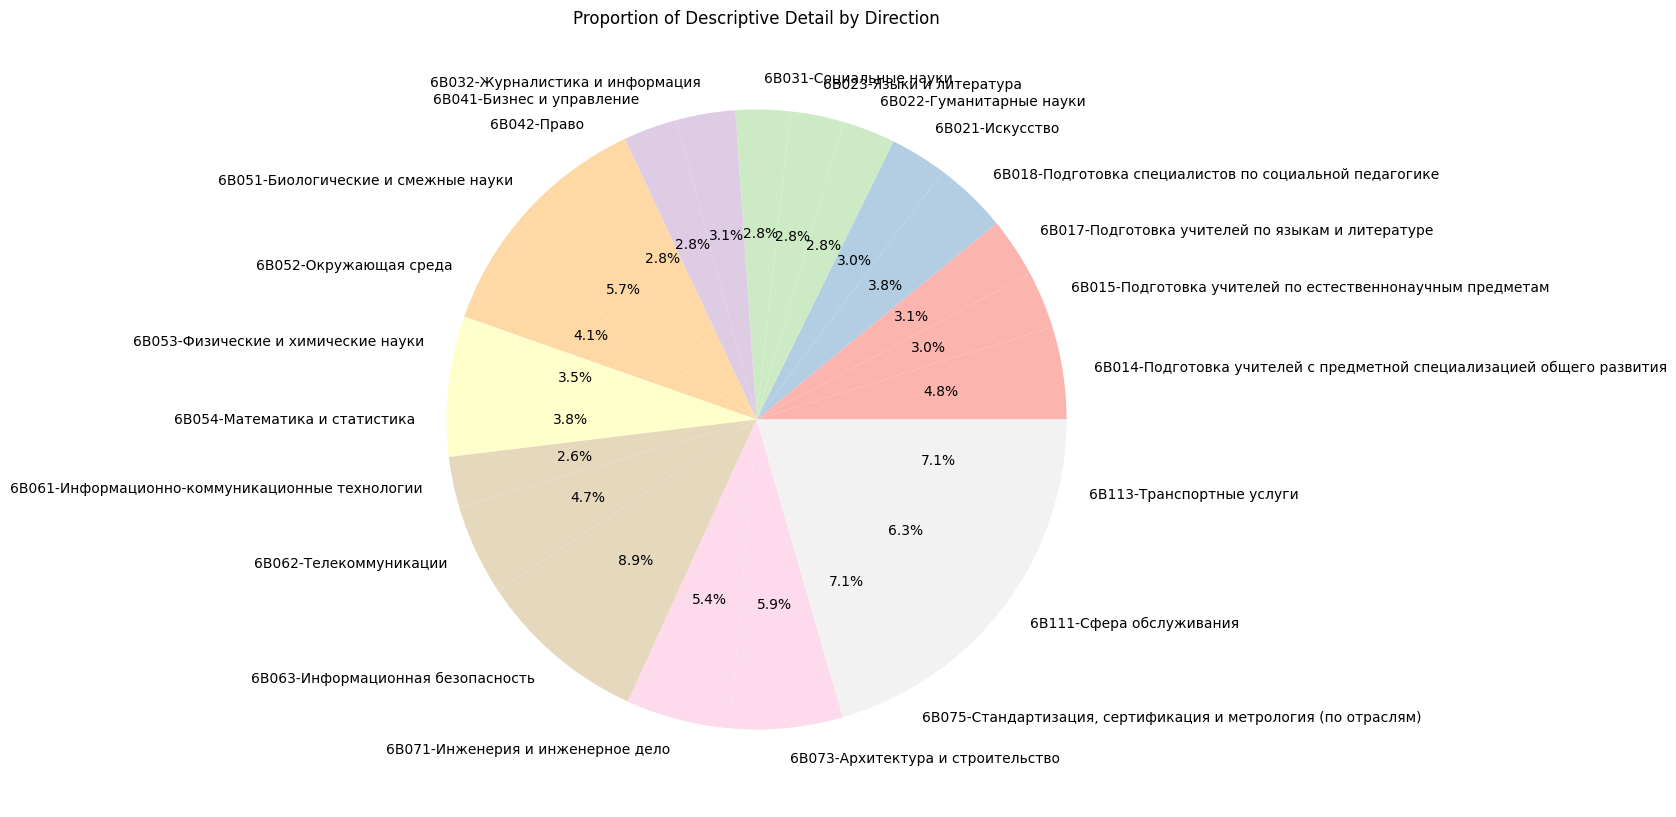

In [29]:
df['Justification_Length'] = df['Justification'].str.len()
text_analysis = df.groupby('Direction')['Justification_Length'].mean()

plt.figure(figsize=(10, 18))
text_analysis.plot(kind='pie', autopct='%1.1f%%', cmap='Pastel1')
plt.title('Proportion of Descriptive Detail by Direction')
plt.ylabel('')
plt.show()

In [30]:
df = pd.read_csv('survey-3.csv', sep=';', encoding='utf-8')
df = df.iloc[:, :6]
df.columns = ['ID', 'Direction', 'Question', 'Program', 'Score_Raw', 'Justification']
df['Direction'] = df['Direction'].ffill()
df['Question'] = df['Question'].ffill()
df['Score'] = df['Score_Raw'].astype(str).str.replace(',', '.').astype(float)

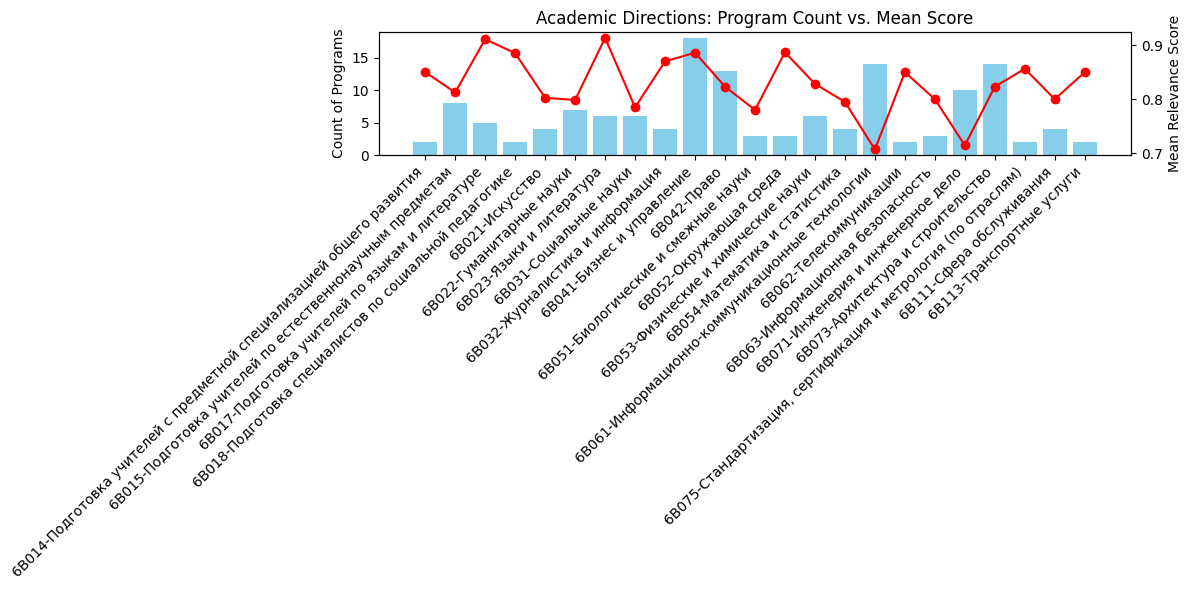

In [31]:
direction_summary = df.groupby('Direction').agg({'Program': 'nunique', 'Score': 'mean'}).rename(columns={'Program': 'Count'})
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(direction_summary.index, direction_summary['Count'], color='skyblue', label='Number of Programs')
ax1.set_ylabel('Count of Programs')
plt.xticks(rotation=45, ha='right')


ax2 = ax1.twinx()
ax2.plot(direction_summary.index, direction_summary['Score'], color='red', marker='o', label='Average Score')
ax2.set_ylabel('Mean Relevance Score')

plt.title('Academic Directions: Program Count vs. Mean Score')
plt.tight_layout()
plt.show()

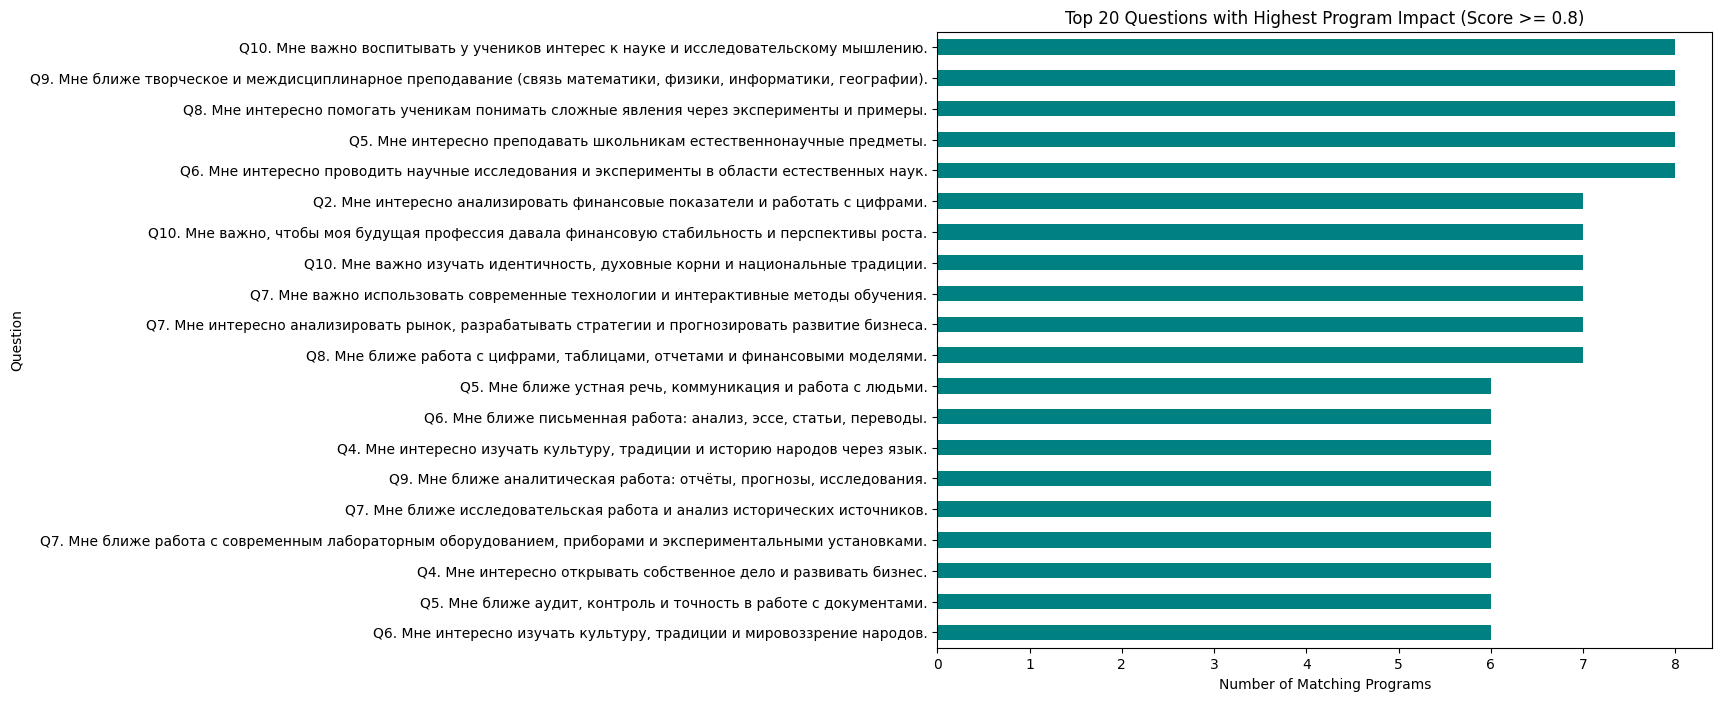

In [32]:
question_impact = df[df['Score'] >= 0.8].groupby('Question').size().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
question_impact.head(20).plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title('Top 20 Questions with Highest Program Impact (Score >= 0.8)')
plt.xlabel('Number of Matching Programs')
plt.show()

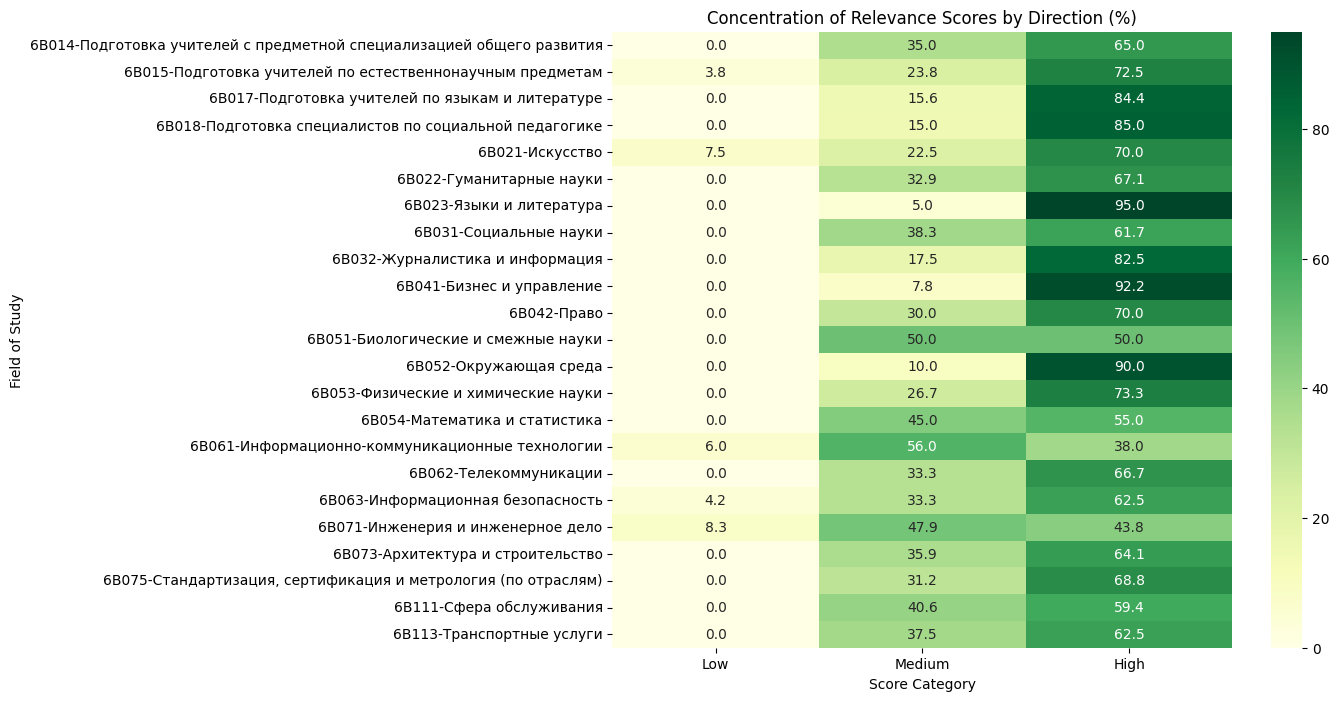

In [33]:
df['Score_Range'] = pd.cut(df['Score'], bins=[0, 0.4, 0.7, 1.0], labels=['Low', 'Medium', 'High'])
density_matrix = pd.crosstab(df['Direction'], df['Score_Range'], normalize='index') * 100

plt.figure(figsize=(10, 8))
sns.heatmap(density_matrix, annot=True, cmap='YlGn', fmt='.1f')
plt.title('Concentration of Relevance Scores by Direction (%)')
plt.xlabel('Score Category')
plt.ylabel('Field of Study')
plt.show()

In [38]:
print(f"Total Educational Programs analyzed: {df['Program'].nunique()}")
print(f"Total Industry Directions: {df['Direction'].nunique()}")
print(f"Highest average score by Direction: {df.groupby('Direction')['Score'].mean().idxmax()}")
print(f"Most 'universal' program (highest cumulative score): {df.groupby('Program')['Score'].sum().idxmax()}")

# Exporting these key insights to a text file
with open("research_summary.txt", "w", encoding="utf-8") as f:
    f.write(f"Research Summary\n" + "="*20 + "\n")
    f.write(f"1. Most Specialized Field: {df.groupby('Direction')['Score'].std().idxmax()}\n")
    f.write(f"2. Number of Questions with Gap (Max score < 0.7): {sum(df.groupby('Question')['Score'].max() < 0.7)}\n")

Total Educational Programs analyzed: 142
Total Industry Directions: 23
Highest average score by Direction: 6B023-Языки и литература
Most 'universal' program (highest cumulative score): 6B02310 — Иностранная филология


In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
cluster_features = ['Score', 'Score_Raw']

cluster_data_clean = df.copy()
for col in cluster_features:
    cluster_data_clean[col] = pd.to_numeric(cluster_data_clean[col], errors='coerce')

cluster_data_clean = cluster_data_clean.dropna(subset=cluster_features)

X = cluster_data_clean[cluster_features]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)
sample_silhouette_values = silhouette_samples(X, cluster_labels)


results_df = cluster_data_clean.copy()
results_df['Silhouette'] = sample_silhouette_values
results_df['Cluster'] = cluster_labels
unique_programs = results_df[['Program', 'Cluster', 'Silhouette']].sort_values(by='Silhouette', ascending=False).head(10)

print("Most Distinctive Programs (High Silhouette Score):")
print(unique_programs)

Most Distinctive Programs (High Silhouette Score):
                                                Program  Cluster  Silhouette
1006                  6B11302 — Логистика (по отраслям)        0    0.928936
1004  6B11301 — Организация перевозок, движения и эк...        0    0.928936
1002                  6B11302 — Логистика (по отраслям)        0    0.928936
1000  6B11301 — Организация перевозок, движения и эк...        0    0.928936
998                   6B11302 — Логистика (по отраслям)        0    0.928936
996   6B11301 — Организация перевозок, движения и эк...        0    0.928936
992            6B11103 — Гостиничное и ресторанное дело        0    0.928936
30    6B06109 — Администрирование и защита компьютер...        0    0.928936
20       6B06112 — Технологии искусственного интеллекта        0    0.928936
988              6B11102 — Организация туристских услуг        0    0.928936


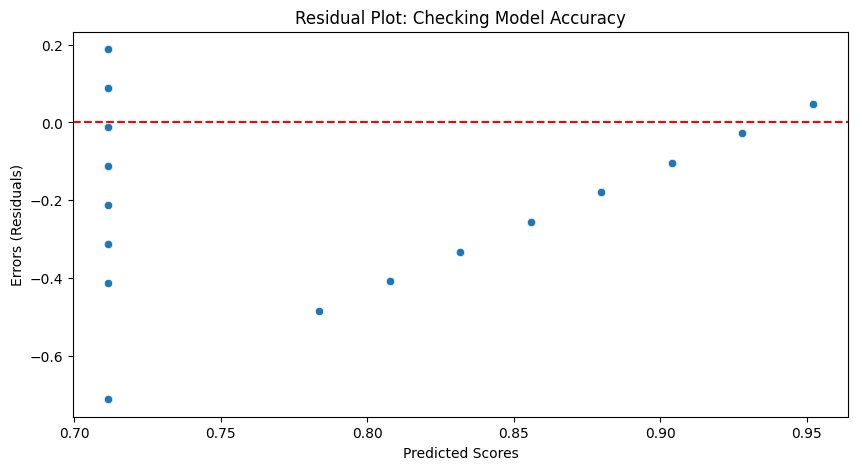

In [57]:
X = df[['Score_Raw']].fillna(0)
y = df['Score'].fillna(0)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot: Checking Model Accuracy')
plt.xlabel('Predicted Scores')
plt.ylabel('Errors (Residuals)')
plt.show()